In [1]:
# Import the libraries/files we want to run
import os
import tensorflow as tf
import tensorflow.keras as keras
import importlib
# local files (stuff we wrote)
import DataProcessing
import ProjectMap
import BaseModel
import DualInputModel
import Analysis

print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")
#This allows changes to be reflected whenever we make them
importlib.reload(DataProcessing)
importlib.reload(BaseModel)
importlib.reload(DualInputModel)

GPU is NOT AVAILABLE


<module 'DualInputModel' from '/Users/pookie/Documents/Penn State/deep_learning/AI570_DeepLearning_Project/scripts/DualInputModel.py'>

In [2]:
# Get the directory layout of the project
PROJECT_MAP= ProjectMap.ProjectMap()
print(PROJECT_MAP)

Root: /Users/pookie/Documents/Penn State/deep_learning/AI570_DeepLearning_Project
Scripts: /Users/pookie/Documents/Penn State/deep_learning/AI570_DeepLearning_Project/scripts
Data: /Users/pookie/Documents/Penn State/deep_learning/AI570_DeepLearning_Project/data


In [3]:
# This gives us a reusable function to load data
# Odds are this is not how we will actually handle the data, it's just easy to do this for the base model
#Added in logic to bring in Plant ID dataset from - https://www.kaggle.com/datasets/yudhaislamisulistya/plants-type-datasets?resource=download

training_data, val_data, testing_data, classes = DataProcessing.loadAllDatasets(PROJECT_MAP.dataDirectory)

Found 23972 files belonging to 30 classes.
Found 3030 files belonging to 30 classes.
Found 2998 files belonging to 30 classes.


In [4]:
# Working with the base model, not meant to be good, just a starting point
# Will probably be removed later
base_model= BaseModel.BaseModel()

layers = [
    keras.layers.Input(shape=(128, 128, 3)),
    keras.layers.Rescaling(1./255),  # normalize pixel values
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(len(classes), activation="softmax")
]

base_model.buildModel(layers)
base_model.compileModel()
#training_results= base_model.trainModel(training_data, val_data=val_data) 
#base_model.testModel(testing_data)

Model built
Model compiled


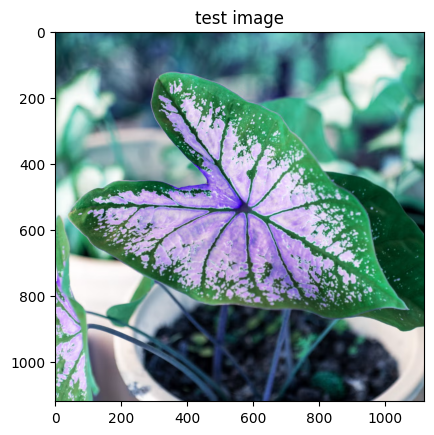

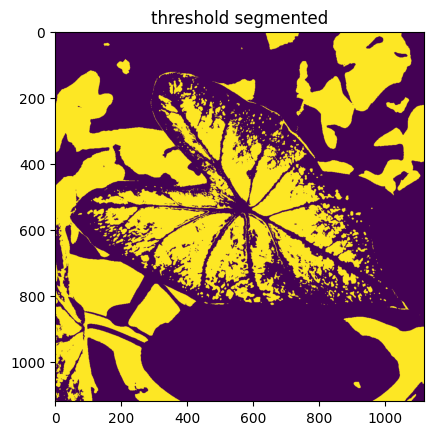

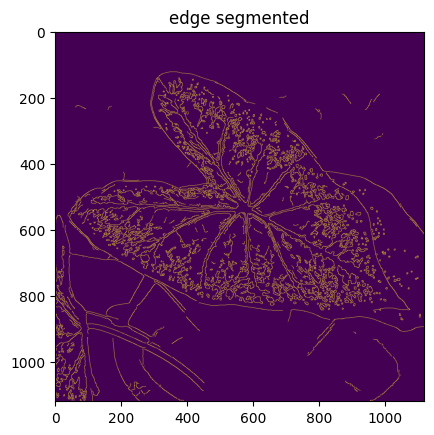

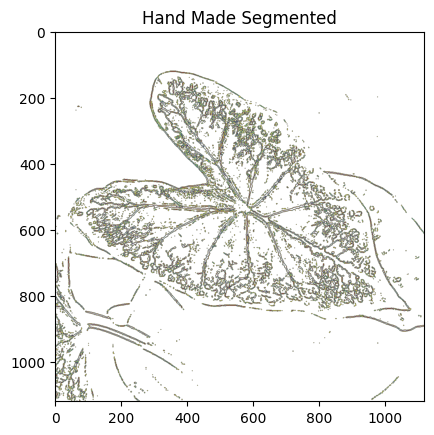

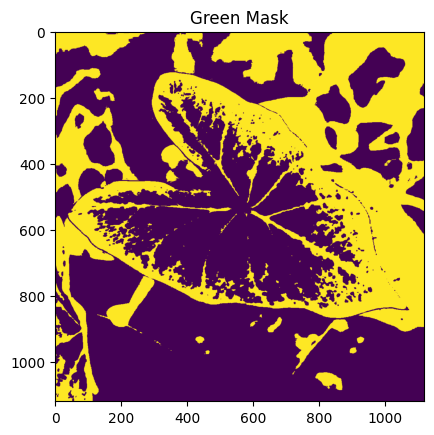

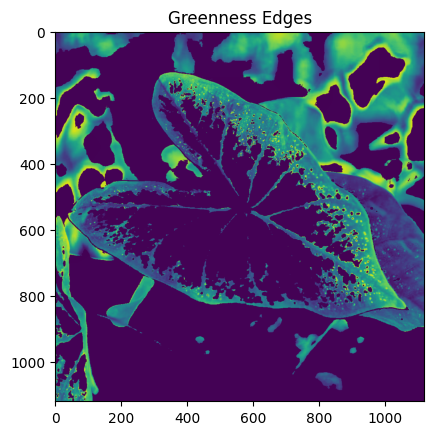

In [5]:
# Testing some of the segmentation code
# Will be removed later

test_image_path= os.path.join(PROJECT_MAP.dataDirectory, 'test.jpg')

test_image= DataProcessing.loadImage(test_image_path)
DataProcessing.displayImage(test_image, "test image")

segmented= DataProcessing.thresholdSegmentation(test_image, 150)
DataProcessing.displayImage(segmented, "threshold segmented")

edge_segmented= DataProcessing.edgeSegmentation(test_image, threshold=50)
DataProcessing.displayImage(edge_segmented, "edge segmented")

h_segmented= DataProcessing.handMadeSegmentation(test_image, 110)
DataProcessing.displayImage(h_segmented, "Hand Made Segmented")

#shows what mask output looks like
green_mask= DataProcessing.getGreennessMask(test_image)
DataProcessing.displayImage(green_mask, "Green Mask")

#shows what edges with CLAHE after greenness mask will look like
greenness_edges = DataProcessing.getEdgesFromGreenness(test_image)
DataProcessing.displayImage(greenness_edges, "Greenness Edges")


In [6]:
training_data, val_data, testing_data, classes = DataProcessing.loadAllDatasets(PROJECT_MAP.dataDirectory)
print(f'Classes: {classes}')
print(f'Len Classes: {len(classes)}')

for image, label in training_data.take(10):
    print("Label:", label.numpy())
#Creating dual sets
train_dual = DataProcessing.create_dual_input_dataset(training_data, DataProcessing.getEdgesFromGreenness)
val_dual = DataProcessing.create_dual_input_dataset(val_data, DataProcessing.getEdgesFromGreenness)
test_dual = DataProcessing.create_dual_input_dataset(testing_data, DataProcessing.getEdgesFromGreenness)

for (inputs, label) in train_dual.take(1):
    print("Raw shape:", inputs[0].shape)
    print("Mask shape:", inputs[1].shape)
    print("Label shape:", label.shape)

Found 23972 files belonging to 30 classes.
Found 3030 files belonging to 30 classes.
Found 2998 files belonging to 30 classes.
Classes: ['aloevera', 'banana', 'bilimbi', 'cantaloupe', 'cassava', 'coconut', 'corn', 'cucumber', 'curcuma', 'eggplant', 'galangal', 'ginger', 'guava', 'kale', 'longbeans', 'mango', 'melon', 'orange', 'paddy', 'papaya', 'peper chili', 'pineapple', 'pomelo', 'shallot', 'soybeans', 'spinach', 'sweet potatoes', 'tobacco', 'waterapple', 'watermelon']
Len Classes: 30
Label: 7
Label: 19
Label: 21
Label: 8
Label: 1
Label: 8
Label: 11
Label: 2
Label: 25
Label: 29
Raw shape: (32, 128, 128, 3)
Mask shape: (32, 128, 128, 1)
Label shape: (32,)


2025-07-17 20:24:09.976736: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-07-17 20:24:10.108775: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
for image, label in training_data.take(10):
    print("Label:", label.numpy())

Label: 27
Label: 24
Label: 8
Label: 22
Label: 10
Label: 3
Label: 23
Label: 2
Label: 28
Label: 27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-103.939..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-102.939..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..150.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-103.939..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-103.939..145.061].
Clipping input d

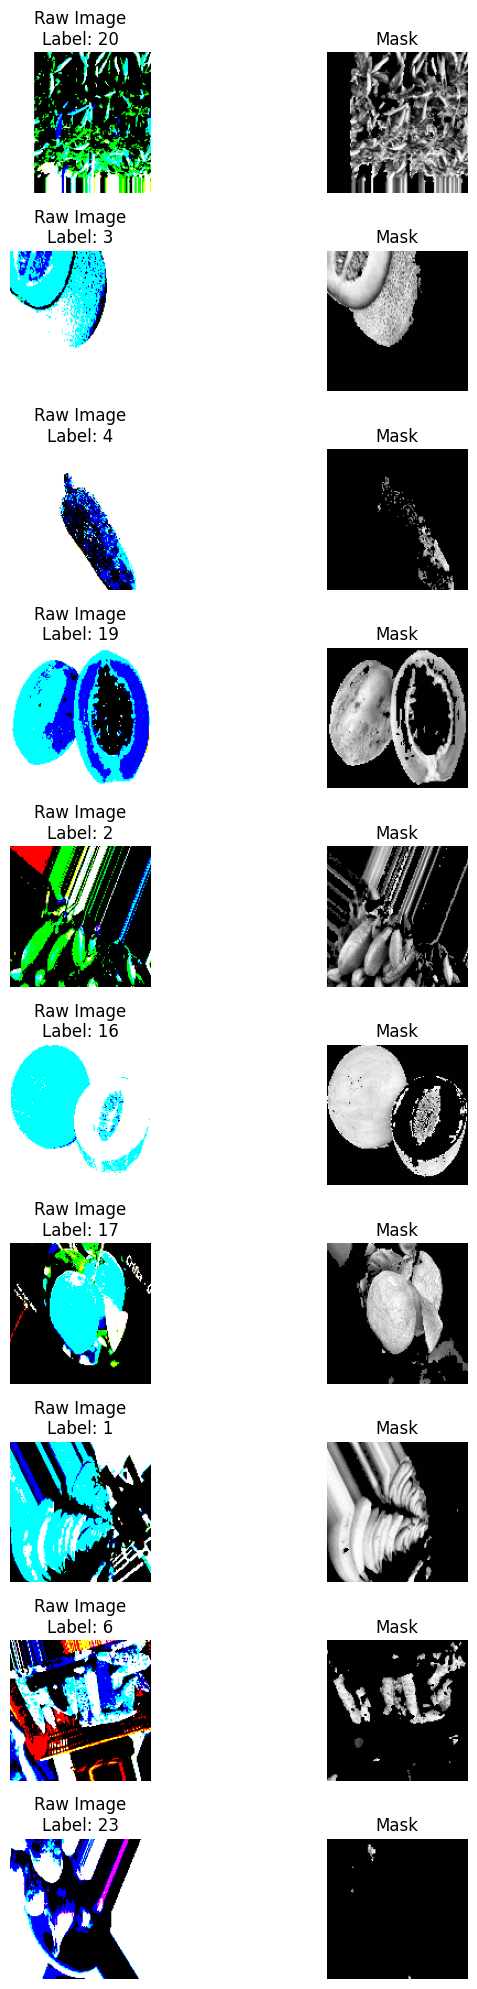

In [8]:
DataProcessing.displayProcessedImages(train_dual, 10)

In [9]:
dual_model = DualInputModel.DualInputModel(num_classes=30)
dual_model.buildModel()

training_metrics= [
    'accuracy',
    keras.metrics.SparseTopKCategoricalAccuracy(k=1, name='top_3_accuracy'),
    keras.metrics.SparseTopKCategoricalAccuracy(k=10, name='top_10_accuracy'),
]

dual_model.compileModel(metrics=training_metrics)
training_results= dual_model.trainModel(train_dual, val_data=val_dual, epochs=3) 
test_predictions, labels, test_accuracy, test_report= dual_model.testModel(test_dual)

Model compiled
Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 807s 1s/step - accuracy: 0.3887 - loss: 2.3555 - top_10_accuracy: 0.8102 - top_3_accuracy: 0.3887 - val_accuracy: 0.7795 - val_loss: 0.7203 - val_top_10_accuracy: 0.9891 - val_top_3_accuracy: 0.7795
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 791s 1s/step - accuracy: 0.7438 - loss: 0.8205 - top_10_accuracy: 0.9871 - top_3_accuracy: 0.7438 - val_accuracy: 0.8340 - val_loss: 0.5175 - val_top_10_accuracy: 0.9927 - val_top_3_accuracy: 0.8340
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 777s 1s/step - accuracy: 0.8231 - loss: 0.5496 - top_10_accuracy: 0.9940 - top_3_accuracy: 0.8231 - val_accuracy: 0.8396 - val_loss: 0.5011 - val_top_10_accuracy: 0.9970 - val_top_3_accuracy: 0.8396
94/94 ━━━━━━━━━━━━━━━━━━━━ 77s 813ms/step


2025-07-17 21:05:03.712767: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
# make some graphs and whatnot for analysis
# Most of the function are defined in the Analysis.py file
import Analysis
    
class_names= training_data.class_names

training_loss= training_results.history['loss']
training_accuracy= training_results.history["accuracy"]
top_3_accuracy= training_results.history["top_3_accuracy"]
top_10_accuracy= training_results.history['top_10_accuracy']

precision, recall, fscore, support= Analysis.getTestData(test_predictions, labels)

Analysis.createBarGraph(precision, class_names, "Precision", "Precision by Class")
Analysis.createBarGraph(recall, class_names, "Recall", "Recall by Class")
Analysis.createBarGraph(fscore, class_names, "F-Score", "F-Score by Class")

Analysis.graphConfusionMatrix(labels, test_predictions, class_names)
Analysis.graphLoss(training_loss, len(class_names), "Training Loss")
Analysis.graphAccuracy(training_accuracy, 0.75, "Training Accuracy")
Analysis.graphAccuracy(top_3_accuracy, 0.75, "Training Top 3 Accuracy")
Analysis.graphAccuracy(top_10_accuracy, 0.75, "Training Top 10 Accuracy")

dual_model.model.summary()


AttributeError: module 'Analysis' has no attribute 'getTestData'